**1. Is it okay to initialize all the weights to the same value as long as that value is selected randomly using He inititialization?**

No, definitely not. The idea of selecting all your weights from the +/- sqrt(6/(n_inputs+n_outputs)) interval is so that you will have an approximately equal variance of the inputs and outputs of that layer. If you set all the weights in a layer to the same value, you will have variance 0 which is not ideal.

**2. Is it okay to initialize the bias terms to 0?**

Yes, it will make no difference.

**3. Name three advantages of the ELU activation function over ReLU.**

- ELU gives a nice, smooth gradient for negative z values while the ReLU has gradient 0 if z<0.

- ELU has negative values when z<0, meaning that the average outputs will be close to 0. This will alleviate vanishing gradient problems.

- "Training time was reduced and the neural network performed better on the test set."

**4. In which cases would you want to use each of the following activation functions?**

- ELU: good for reducing the vanishing gradients problem

- leaky ReLU: if you notice that a lot of your neurons are "dying", simply changing the activation to leaky_ReLU may help.

- ReLU: the fastest of the options to compute, good if you want a very quick lightweight model.

- tanh: same as logistic but goes between -1 and 1. Could be used as the output layer if you want a -1 definitely false, +1 definitely true kind of confidence scale.

- logistic: Could be used as the output layer if you want a 0 no idea, +1 definitely true kind of confidence scale.

- softmax: Used as the output layer in multi-class classification tasks. Chooses the highest probability score.

**5. What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using the SGD optimizer?**

The algorithm will act almost like there is no friction and it may completely overshoot the global minimum.

**6. Name three ways you can produce a sparse model.**

1. Set a threshold value and any weights that are below that value are set to 0.

2. Use heavy l2 regularization to punish non-zero values.

3. Implement Follow the Regularized Leader regularization.

**7. Does dropout slow down training? Does it slow dow inference?**

Yes, dropout does slow down training, but it is typically worth the slowdown in terms of building a more robust model. It will not slow down inference however because dropout is not applied during inference.

**8. Deep Learning!**

*a. Build a DNN with 5 hidden layers of 100 neurons each, He initialization, and the ELU activation function.*

In [32]:
import tensorflow as tf
import numpy as np
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.Dense(5, activation='softmax')
])

*b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise.*

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping()
tensorboard = tf.keras.callbacks.TensorBoard()

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

In [35]:
train_filter = np.isin(y_train,np.arange(0,5))
test_filter = np.isin(y_test, np.arange(0,5))

In [36]:
model.fit(x_train[train_filter], y_train[train_filter], validation_data=(x_test[test_filter],y_test[test_filter]),
         epochs=20, callbacks=[early_stop,tensorboard])

Epoch 1/20
957/957 [==============================] - 3s 3ms/step - loss: 0.1163 - accuracy: 0.9655 - val_loss: 0.0981 - val_accuracy: 0.9665
Epoch 2/20
957/957 [==============================] - 2s 3ms/step - loss: 0.0604 - accuracy: 0.9818 - val_loss: 0.0460 - val_accuracy: 0.9852
Epoch 3/20
957/957 [==============================] - 2s 3ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0491 - val_accuracy: 0.9837


*c. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?*

In [37]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model2.fit(x_train[train_filter], y_train[train_filter], validation_data=(x_test[test_filter],y_test[test_filter]),
         epochs=20, callbacks=[early_stop,tensorboard])

Epoch 1/20
957/957 [==============================] - 6s 6ms/step - loss: 0.1224 - accuracy: 0.9634 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 2/20
957/957 [==============================] - 3s 4ms/step - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.0427 - val_accuracy: 0.9877


The model does converge a lot faster, even if each epoch is slightly longer. This added time will be less as the epochs go on though.

*e. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?*

In [41]:
model2_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(100, kernel_initializer='glorot_uniform',activation=tf.keras.activations.elu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model2_dropout.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
model2_dropout.fit(x_train[train_filter], y_train[train_filter], validation_data=(x_test[test_filter],y_test[test_filter]),
         epochs=20, callbacks=[early_stop,tensorboard])

Epoch 1/20
957/957 [==============================] - 6s 7ms/step - loss: 0.4952 - accuracy: 0.8389 - val_loss: 0.0943 - val_accuracy: 0.9708
Epoch 2/20
957/957 [==============================] - 4s 4ms/step - loss: 0.2316 - accuracy: 0.9332 - val_loss: 0.0787 - val_accuracy: 0.9755
Epoch 3/20
957/957 [==============================] - 4s 4ms/step - loss: 0.1971 - accuracy: 0.9438 - val_loss: 0.0674 - val_accuracy: 0.9796
Epoch 4/20
957/957 [==============================] - 4s 5ms/step - loss: 0.1752 - accuracy: 0.9519 - val_loss: 0.0564 - val_accuracy: 0.9819
Epoch 5/20
957/957 [==============================] - 4s 4ms/step - loss: 0.1585 - accuracy: 0.9569 - val_loss: 0.0546 - val_accuracy: 0.9829
Epoch 6/20
957/957 [==============================] - 4s 4ms/step - loss: 0.1506 - accuracy: 0.9583 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 7/20
957/957 [==============================] - 5s 5ms/step - loss: 0.1303 - accuracy: 0.9633 - val_loss: 0.0439 - val_accuracy: 0.9858
Epoch 

**9. Transfer learning**

*a. Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them and replaces the softmax output layer with a new one.*

In [48]:
input_layer = tf.keras.layers.Input((28,28),name='input')
flatten = tf.keras.layers.Flatten(name='flatten')(input_layer)
dense1 = tf.keras.layers.Dense(100, activation=tf.keras.activations.elu)(flatten)
batch_norm1 = tf.keras.layers.BatchNormalization()(dense1)
dropout
for layer in transfer_model.layers:
    layer.trainable=False
transfer_model.add(tf.keras.layers.Dense(5, activation='softmax'))

*b. Train the new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Can you achieve high precision?*

In [120]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

In [121]:
train_filter = np.where(np.logical_and(y_train>=5,y_train<=9))
test_filter = np.where(np.logical_and(y_test>=5,y_test<=9))
y_train = y_train[train_filter]
y_test = y_test[test_filter]

In [124]:
y_train = tf.keras.utils.to_categorical(y_train-5, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test-5,num_classes=5)

In [125]:
transfer_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [128]:
transfer_model.fit(x_train[:500],y_train[:500],
                   validation_data=(x_test,y_test), epochs=20, callbacks=[tensorboard,early_stop])

Epoch 1/20


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [160]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-128-2a3e0a44182a>:1) ]] [Op:__inference_train_function_140761]

Function call stack:
train_function


In [79]:
transfer_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)             

**10. Pretraining on an auxillary task.**

*a. Build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not.*

In [566]:
input_a = tf.keras.layers.Input((28,28),name='input_a')
flatten_a = tf.keras.layers.Flatten(name='flatten_a')(input_a)
dense1 = tf.keras.layers.Dense(100, activation=tf.keras.activations.elu,name='hidden1_a')(flatten_a)
dropout1 = tf.keras.layers.Dropout(.5)(dense1)
dense2 = tf.keras.layers.Dense(100, activation=tf.keras.activations.elu,name='hidden2_a')(dropout1)
dropout2 = tf.keras.layers.Dropout(.5)(dense2)
output_a = tf.keras.layers.Dense(100, activation=tf.keras.activations.elu,name='hidden3_a')(dropout2)

In [567]:
input_b = tf.keras.layers.Input((28,28),name='input_b')
flatten_b = tf.keras.layers.Flatten(name='flatten_b')(input_b)
dense1 = tf.keras.layers.Dense(100, activation=tf.keras.activations.elu,name='hidden1_b')(flatten_b)
dropout1 = tf.keras.layers.Dropout(.5)(dense1)
dense2 = tf.keras.layers.Dense(100, activation=tf.keras.activations.elu,name='hidden2_b')(dropout1)
dropout2 = tf.keras.layers.Dropout(.5)(dense2)
output_b = tf.keras.layers.Dense(100, activation=tf.keras.activations.elu,name='hidden3_b')(dropout2)

In [568]:
concat = tf.keras.layers.Concatenate(axis=1,name='concat')([output_a,output_b])
dense_total = tf.keras.layers.Dense(100,activation=tf.keras.activations.elu,name='hidden_total')(concat)
dropout_total = tf.keras.layers.Dropout(.5)(dense_total)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_total)

In [569]:
model = tf.keras.models.Model(inputs=[input_a,input_b], outputs=[output])

In [570]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_a (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_b (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_a (Flatten)             (None, 784)          0           input_a[0][0]                    
__________________________________________________________________________________________________
flatten_b (Flatten)             (None, 784)          0           input_b[0][0]                    
____________________________________________________________________________________________

In [571]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

*b. Split the MNIST training set in two sets: split #1 should contain 55,000 images, and split #2 should contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.*

In [572]:
(x_train, y_train), (_,_) = tf.keras.datasets.mnist.load_data()
x_test, y_test = x_train[-5000:], y_train[-5000:]
x_train, y_train = x_train[:-5000], y_train[:-5000]
print(len(x_train),len(x_test))

55000 5000


In [573]:
organized = [x_train[np.where(y_train==val)] for val in range(10)]

In [574]:
X_a, X_b = [], []
y = []
num_instances = 50000
indices = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
numbers = []
for instance in range(num_instances):
    if np.random.random() > .5:
        rand_int = (int)(np.random.random() * 10)
        if indices[rand_int]+1<len(organized[rand_int]):
            indices[rand_int] = 0
        a,b = organized[rand_int][indices[rand_int]], organized[rand_int][indices[rand_int]+1]
        indices[rand_int] += 2
        X_a.append(a)
        X_b.append(b)
        y.append(1)
        numbers.append(rand_int)
    else:
        rand_int_1 = (int)(np.random.random()*10)
        rand_int_2 = (int)(np.random.random()*10)
        #while rand_int_1 == rand_int_2:
        #    rand_int_2 = (int)(np.random.random()*10)
        if indices[rand_int_1]<len(organized[rand_int_1]):
            indices[rand_int_1] = 0
        if indices[rand_int_2]<len(organized[rand_int_2]):
            indices[rand_int_2] = 0
        a,b = organized[rand_int_1][indices[rand_int_1]], organized[rand_int_2][indices[rand_int_2]]
        indices[rand_int_1] += 1
        indices[rand_int_2] += 1
        X_a.append(a)
        X_b.append(b)
        y.append(0)
        numbers.append(rand_int_1)
        numbers.append(rand_int_2)

X_a = np.array(X_a)
X_b = np.array(X_b)
y = np.array(y)


In [575]:
np.average(y)

0.50068

In [576]:
def unison_shuffled_copies(a, b, c):
    assert len(a) == len(b) and len(a) == len(c)
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p]

In [577]:
X_a, X_b, y = unison_shuffled_copies(X_a, X_b, y)

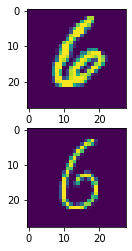

1

In [578]:
import matplotlib.pyplot as plt
%matplotlib inline
index = -19
plt.subplot(211)
plt.imshow(X_a[index])
plt.subplot(212)
plt.imshow(X_b[index])
plt.show()
y[index]

In [579]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, monitor='accuracy')

*c. Train the DNN on this training set.*

In [580]:
model.fit([X_a/255., X_b/255.], y, shuffle=False, batch_size=128, epochs=50, initial_epoch=0, callbacks=[early_stop])

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0208 - accuracy: 0.9898
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 2.5300e-05 - accuracy: 1.0000
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 9.6160e-06 - accuracy: 1.0000
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 6.6081e-06 - accuracy: 1.0000


*d. Now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons. Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class.*

In [590]:
input_a = tf.keras.layers.Input((28,28))
flatten = tf.keras.layers.Flatten(name='flatten')(input_a)
hidden1 = model.get_layer(name='hidden1_a')(flatten)
hidden1.trainable=False
dropout1 = model.get_layer(name='dropout_16')(hidden1)
hidden2 = model.get_layer(name='hidden2_a')(dropout1)
hidden2.trainable=False
dropout2 = model.get_layer(name='dropout_17')(hidden2)
hidden3 = model.get_layer(name='hidden3_a')(dropout2)
hidden3.trainable=False


dropout3 = tf.keras.layers.Dropout(.5)(hidden3)
output = tf.keras.layers.Dense(10, activation='softmax')(dropout3)

classifier = tf.keras.models.Model(inputs=[input_a], outputs=[output])
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [591]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='accuracy')

In [592]:
classifier.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1_a (Dense)            (None, 100)               78500     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
hidden2_a (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
hidden3_a (Dense)            (None, 100)               1010

In [593]:
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [594]:
y_test_cat.shape

(5000, 10)

In [595]:
classifier.fit(x_test/255., y_test, batch_size=32, epochs=15, callbacks=[early_stop])

Epoch 1/15
157/157 [==============================] - 0s 2ms/step - loss: 1.1482 - accuracy: 0.6242
Epoch 2/15
157/157 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.8066
Epoch 3/15
157/157 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8338
Epoch 4/15
157/157 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8680
Epoch 5/15
157/157 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8712
Epoch 6/15
157/157 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8720
Epoch 7/15
157/157 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8882
Epoch 8/15
157/157 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8922
Epoch 9/15
157/157 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8992
Epoch 10/15
157/157 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.9000

Wow, this worked really well, I never new about this technique before!